In [1]:
%matplotlib inline
import sys
sys.path.append('C:/Users/xiaoyu/PycharmProjects/ND3M')
from gen_network import *
import matplotlib.pyplot as pl
import time

In [2]:
def _diffuse_(G,p,q,num_of_run=25):
    '''
    the implementation of the agent-based model
    :param G: network
    :param p: coefficient of external influence
    :param q: coefficient of internal influence
    :param num_of_run: number of runs
    :return: the non-cummulative penetration curve
    '''
    if not G.is_directed():
        G = G.to_directed()
        
    for i in G.nodes_iter():
        G.node[i]['state'] = False
        G.node[i]['prede'] = G.predecessors(i)
        
    non_set = np.array(G.nodes())
    num_of_adopt = []
    for u in xrange(num_of_run):
        #获取各节点已采纳邻居数量
        len_non = len(non_set)
        influ = np.zeros(len_non)
        for i in xrange(len_non): 
            influ[i] = len([k for k in G.node[non_set[i]].get('prede',[]) if G.node[k]['state']])
      
        #获取本时间步采纳者数量
        prob = 1-(1-p)*(1-q)**influ
        rand = np.random.random(len_non)
        upda = rand<=prob
        num_of_adopt.append(np.sum(upda))
        #更新本时间步已采纳节点的状态
        for i in non_set[upda]:
            G.node[i]['state'] = True
        
        non_set = non_set[rand>prob] #更新未采纳节点集合         
    return num_of_adopt

In [3]:
n = 10000
g = 'power'
d = 6
k_list = np.arange(1,50)
g_graph = gener_random_graph(n,d,k_list,g)
G = g_graph.generate()

In [11]:
p, q = 0.0001, 0.05
diff_cont = []
t1 = time.clock()
for i in range(200):
    diff = _diffuse_(G, p, q, num_of_run=40)
    diff_cont.append(diff)
print 'Time elapsed:%.2fs'%(time.clock() - t1)

Time elapsed:122.61s


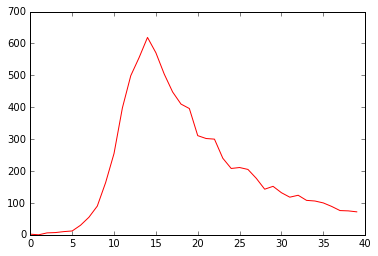

In [12]:
pl.plot(diff_cont[5],'r-')

In [57]:
fig = pl.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
ax.plot( np.mean(diff_cont, axis=0), 'r-', lw=2)
ax.set_xlim([0,40])
ax.set_ylim([0,800])
for x in diff_cont[:20]:
    ax.plot(x, color='b', alpha=0.3)

In [17]:
db = np.array(diff_cont).T.tolist()

(array([  3.,   3.,   5.,   0.,   7.,  17.,  43.,  42.,  46.,  34.]),
 array([  30.,   92.,  154.,  216.,  278.,  340.,  402.,  464.,  526.,
         588.,  650.]),
 <a list of 10 Patch objects>)

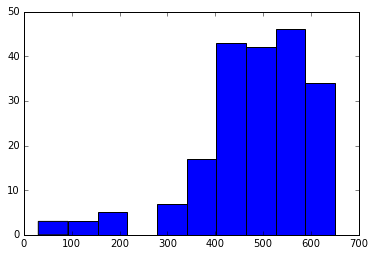

In [58]:
pl.hist(db[18])

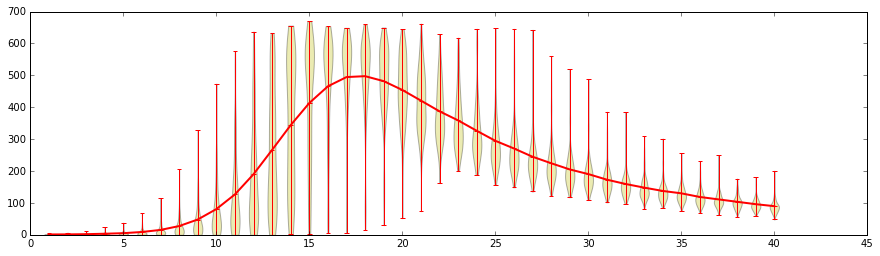

In [37]:
fig = pl.figure(figsize=(15, 4))
ax = fig.add_subplot(1,1,1)

ax.violinplot(db, showmeans=True)
ax.plot(np.arange(1,41), np.mean(diff_cont, axis=0), 'r-',lw=2)

In [67]:
fig.savefig('C:/Users/xiaoyu/PycharmProjects/ND3M/diff.jpg')